In [1]:
import pandas as pd
import os
os.chdir("/home/abhisek/Studies/Python program/Data Kaggle/Titanic")

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Cabin Feature

In [4]:
import numpy as np
df["Cabin_null"]=np.where(df["Cabin"].isnull(),1,0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


#### Emnarked feature

In [5]:
lst_embarked=df["Embarked"].value_counts().head(2).index
lst_embarked=list(lst_embarked)
lst_embarked

['S', 'C']

In [6]:
for embarked in lst_embarked:
    df[embarked]=np.where(df["Embarked"]==embarked,1,0)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,S,C
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0


#### Sex feature

In [8]:
lst_sex=df["Sex"].value_counts().head(1).index
lst_sex=list(lst_sex)
lst_sex

['male']

In [9]:
for sex in lst_sex:
    df[sex]=np.where(df["Sex"]==sex,1,0)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,S,C,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,1


#### Age Feature 

In [11]:
# we have to handle the nan values in Age by replacing it with median value
def impute_nan(data,variable,median):
    df[variable +"_median"]=df[variable].fillna(median)

In [12]:
median=df["Age"].median()
median

28.0

In [13]:
impute_nan(df,"Age",median)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,S,C,male,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,0,1,35.0


In [14]:
df["Age_median"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age_median, dtype: float64

/home/abhisek/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_median'>

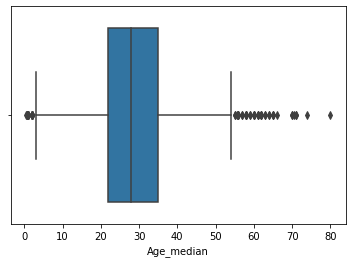

In [15]:
# checking the outlier
import seaborn as sns
sns.boxplot(df["Age_median"])

/home/abhisek/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

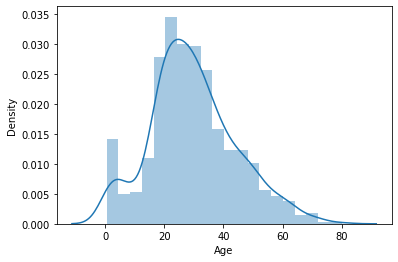

In [16]:
# see the distribution of Age 
sns.distplot(df["Age"])

/home/abhisek/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_median', ylabel='Density'>

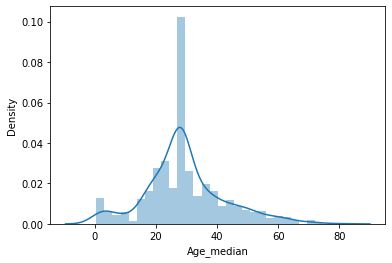

In [17]:
sns.distplot(df["Age_median"])

In [18]:
max_point=(35+(1.5*(35-22)))
max_point

54.5

In [19]:
min_point=(22-(1.5*(35-22)))
min_point

2.5

In [20]:
df["Age_median"][df["Age_median"]>max_point]=max_point

<ipython-input-20-4921d108b319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_median"][df["Age_median"]>max_point]=max_point


In [21]:
df["Age_median"][df["Age_median"]<min_point]=min_point

<ipython-input-21-20c4fc4a7f4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_median"][df["Age_median"]<min_point]=min_point


/home/abhisek/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_median'>

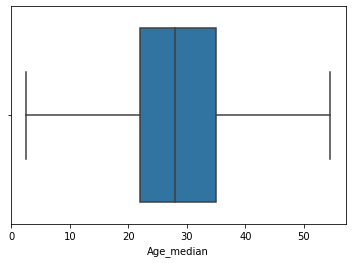

In [22]:
sns.boxplot(df["Age_median"])

#### Fare feature 

/home/abhisek/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

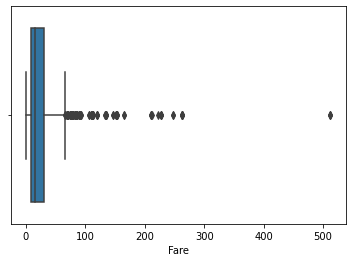

In [23]:
# checking the outliers
sns.boxplot(df["Fare"])

In [24]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
max_point1=(31+(3*(31-7.910)))
max_point1

100.27

In [26]:
df["Fare"][df["Fare"]>max_point1]=max_point1

<ipython-input-26-2b5b78ee4bdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fare"][df["Fare"]>max_point1]=max_point1


/home/abhisek/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

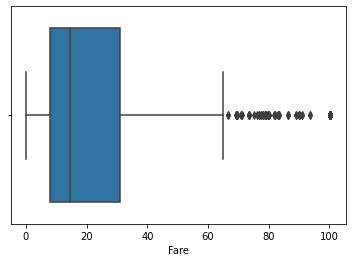

In [27]:
sns.boxplot(df["Fare"])

/home/abhisek/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

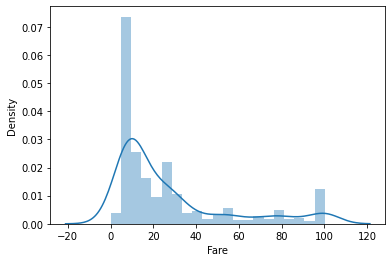

In [28]:
sns.distplot(df["Fare"])

In [29]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null,S,C,male,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1,0,38.0


#### Extracting Features

In [30]:
# Independant Varibale
X=df.iloc[:,[2,6,7,9,12,13,14,15,16]]
X.head(2)

,Pclass,SibSp,Parch,Fare,Cabin_null,S,C,male,Age_median
0,3,1,0,7.2500,1,1,0,1,22.0
1,1,1,0,71.2833,0,0,1,0,38.0


In [31]:
# Dependant Varibale
y=df.iloc[:,[1]]
y.head(2)

,Survived
0,0
1,1


#### Feature Selection

In [42]:
# Apply SelectKBest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
top_rank=SelectKBest(score_func=chi2,k=9)
top_rank.fit(X,y)

SelectKBest(k=9, score_func=<function chi2 at 0x7f712ea13040>)

In [43]:
top_rank.scores_

array([  30.87369944,    2.58186538,   10.09749911, 2489.06406701,
         20.48831435,    5.98483982,   20.46440127,   92.70244698,
         16.41466367])

In [50]:
df.features=pd.DataFrame(X.columns,columns=["Features"])
df.scores=pd.DataFrame(top_rank.scores_,columns=["Scores"])
after_concat=pd.concat([df.features,df.scores],axis=1)
after_concat.nlargest(9,"Scores")

,Features,Scores
3,Fare,2489.064067
7,male,92.702447
0,Pclass,30.873699
4,Cabin_null,20.488314
6,C,20.464401
8,Age_median,16.414664
2,Parch,10.097499
5,S,5.984840
1,SibSp,2.581865


In [51]:
### Applying Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
imp=ExtraTreesClassifier()
imp.fit(X,y)

<ipython-input-51-af5fa41db7d9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  imp.fit(X,y)


ExtraTreesClassifier()

In [52]:
imp.feature_importances_

array([0.08717404, 0.04702856, 0.0410083 , 0.22426139, 0.04962542,
       0.01656319, 0.01343175, 0.28205812, 0.23884922])

In [55]:
df.features=pd.DataFrame(X.columns,columns=["Features"])
df.imp=pd.DataFrame(imp.feature_importances_,columns=["Importances"])
after_concat1=pd.concat([df.features,df.imp],axis=1)
after_concat1.nlargest(9,"Importances")

,Features,Importances
7,male,0.282058
8,Age_median,0.238849
3,Fare,0.224261
0,Pclass,0.087174
4,Cabin_null,0.049625
1,SibSp,0.047029
2,Parch,0.041008
5,S,0.016563
6,C,0.013432


In [56]:
# updating the independant Variable
X_upt=X.iloc[:,[0,3,4,7,8]]
X_upt

,Pclass,Fare,Cabin_null,male,Age_median
0,3,7.2500,1,1,22.0
1,1,71.2833,0,0,38.0
2,3,7.9250,1,0,26.0
3,1,53.1000,0,0,35.0
4,3,8.0500,1,1,35.0
...,...,...,...,...,...
886,2,13.0000,1,1,27.0
887,1,30.0000,0,0,19.0
888,3,23.4500,1,0,28.0
889,1,30.0000,0,1,26.0


#### Standarise the Data

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std=scaler.fit_transform(X_upt)
X_std

array([[ 0.82737724, -0.72438168,  0.54492498,  0.73769513, -0.58343208],
       [-1.56610693,  1.61907363, -1.835115  , -1.35557354,  0.74268522],
       [ 0.82737724, -0.69967841,  0.54492498, -1.35557354, -0.25190275],
       ...,
       [ 0.82737724, -0.13150304,  0.54492498, -1.35557354, -0.08613809],
       [-1.56610693,  0.10821024, -1.835115  ,  0.73769513, -0.25190275],
       [ 0.82737724, -0.70608296,  0.54492498,  0.73769513,  0.24539123]])

In [62]:
# training and testing 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.4691,random_state=42)

In [64]:
# Applying Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/home/abhisek/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [65]:
y_pred=logreg.predict(X_test)

In [71]:
# Checking the Confusion matric for classifiction 
from sklearn.metrics import confusion_matrix
cnf_max=confusion_matrix(y_test,y_pred)
cnf_max

array([[213,  35],
       [ 43, 127]])

In [76]:
# Checking the accuracy 
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("pecision:",metrics.precision_score(y_test,y_pred))

Accuracy: 0.8133971291866029
Recall: 0.7470588235294118
pecision: 0.7839506172839507


In [77]:
# apply Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

<ipython-input-77-b09d3224ed92>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier()

In [78]:
y_predic=rfc.predict(X_test)

In [80]:
 ### Checking the Confusion matric for classifiction 
from sklearn.metrics import confusion_matrix
cnf_max1=confusion_matrix(y_test,y_predic)
cnf_max1

array([[207,  41],
       [ 47, 123]])

In [81]:
# Checking the accuracy 
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_predic))
print("Recall:",metrics.recall_score(y_test,y_predic))
print("pecision:",metrics.precision_score(y_test,y_predic))

Accuracy: 0.7894736842105263
Recall: 0.7235294117647059
pecision: 0.75


In [82]:
y_pred=pd.DataFrame(y_pred)

In [83]:
y_pred.to_csv("Survival_pred")